# EXPORT SHARES: UKRAINIAN AGRICULTURAL EXPORTS

Name: Josemaria Macedo Carrillo\
Created: 08/07/23\
Last modified: 01/18/24\
DSI

The purpose of this notebook is to analyze data on Ukrainian agricultural
exports for October 2022 (busiest month according to BSGI). The main data sources
are the Black Sea Grain Initiative (BSGI) of the United
Nations and Import Genius (IG), a website that has trade data for different countries
including Ukraine.

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from utils.nb_plots import plot_all_period, plot_pc_monthly
from utils.clean_data import export_csv
import os
from config import CLEAN_FILES, IG_FILES_PATH

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## TOTAL EXPORTS BY COMPANY

### PIE CHART FOR WHOLE PERIOD (August 2022 -  March 2023)

We get the data from Import Genius (IG) and Black Sea Grain Initiative (BSGI) for some countries ("asia", "spain" or "belgium").

In [3]:
country = "asia"
file = CLEAN_FILES[country]
path = os.path.join(IG_FILES_PATH, file)
ig = pd.read_csv(path)

Plot export shares for the whole period (August 2022 until March 2023)

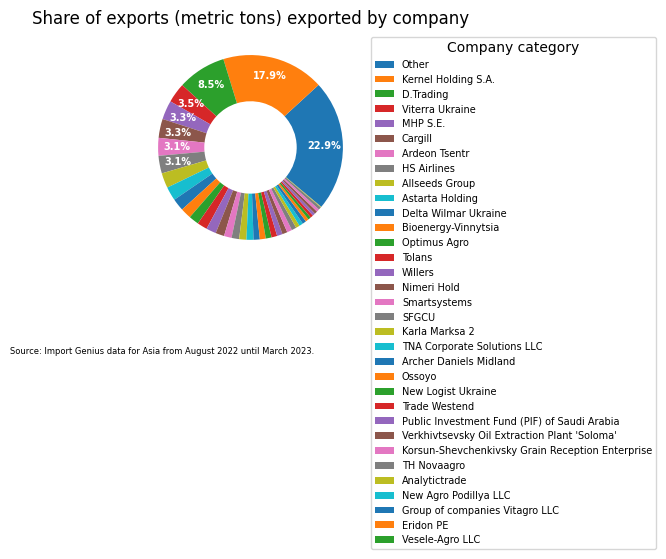

,company_std,weight_ton
0,Other,157749.4196
1,Kernel Holding S.A.,123294.1390
2,D.Trading,58324.2000
3,Viterra Ukraine,23874.4200
4,MHP S.E.,22918.3040
5,Cargill,22776.8550
6,Ardeon Tsentr,21447.1000
7,HS Airlines,21151.7900
8,Allseeds Group,18015.1320
9,Astarta Holding,16680.7950


In [4]:
data_source = f"Import Genius data for {country.capitalize()} from August 2022 until March 2023"

export_shares_all = plot_all_period(ig, data_source, min_wedge_percentage=3, min_legend_percentage=.5)
export_shares_all

We plot exports now by month.

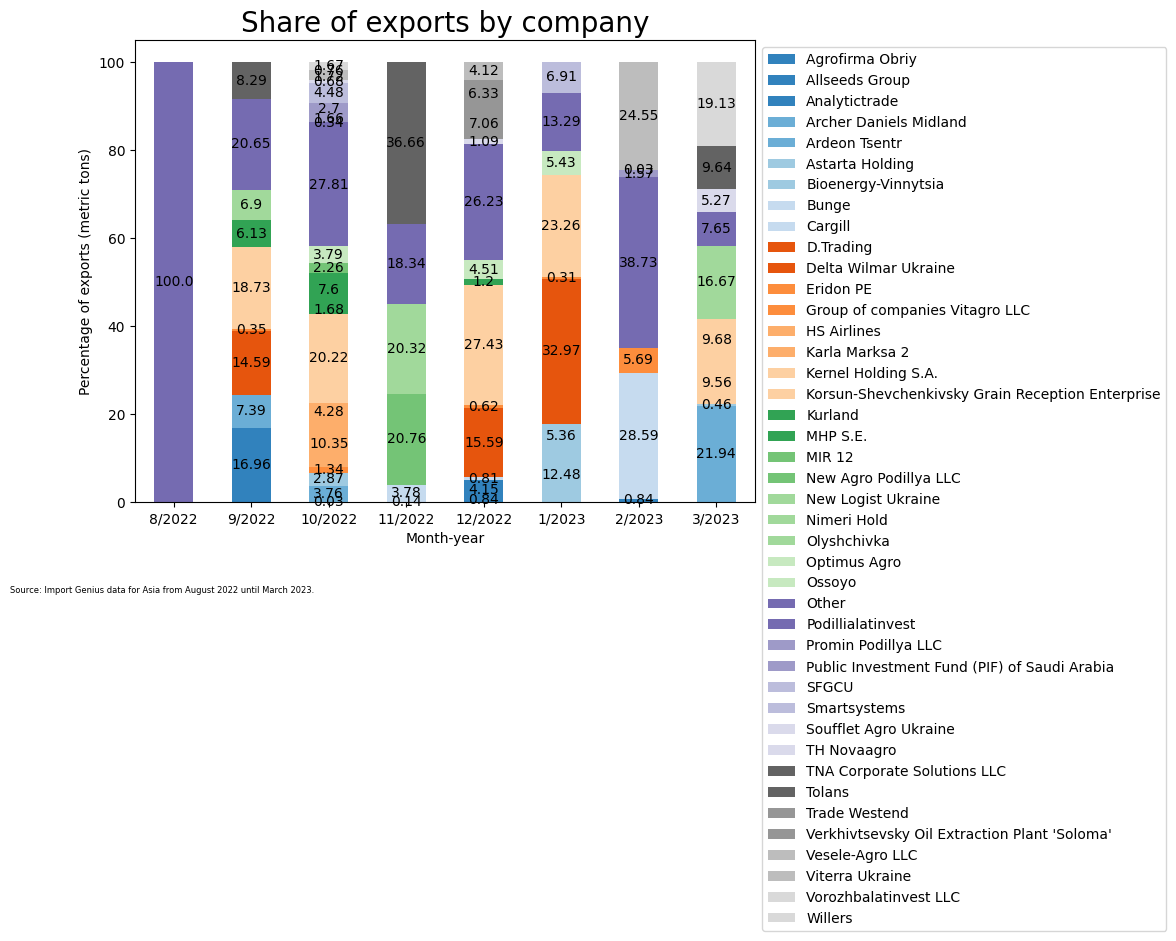

In [5]:
grouping_cols = ["year", "month", "company_std"]
other_cols = ["weight_ton"]
sort_by = ["year", "month", "company_std"]
aggregate_by = {"weight_ton": "sum"}
x_title = "Month-year"
y_title = "Percentage of exports (metric tons)"
plot_title = "Share of exports by company"
x_axis_ticks = "date"


plot_pc_monthly(df=ig, group=grouping_cols, agg_cols=other_cols,
                sort=sort_by, asc_bool=True, agg_dict=aggregate_by,
                x_title=x_title, y_title=y_title, plot_title=plot_title,
                x_axis_ticks=x_axis_ticks, data_source=data_source)

## TABLE WITH EXPORTS BY COMPANY (ALL COMPANIES INCLUDED)

We only keep the columns that we care about which are the subsidiary name, parent company name and weight of exported commodities by the subsidiary.

In [6]:
file_name = f"total_exports_by_company_{country}.csv"
export_csv(ig, file_name, translate=False)